FYP2 HIKARI-21 DT - Multiclass-Classification. Mikhail Amzar CS0107477

# [Model Using Resampled data and default data for Train set + Imbalanced data for Testing ]
Split train-test

- Train set undergo resampling and fitted into a model to train.
- Test set remain imbalanced and tested using the model

## Neptune 

### install *neptune*

In [ ]:
! pip install -U neptune
import neptune

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.1/448.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 99.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.1 MB/s eta 0:00:00


### run neptune

In [ ]:
from getpass import getpass


my_api_token = getpass("Enter your Neptune API token: ")
my_project = "mikhailamzar/FYP2"

Enter your Neptune API token: ··········


In [ ]:
run = neptune.init_run(
    project=my_project,
    api_token=my_api_token,
    capture_hardware_metrics=True,
    capture_stderr=True,
    capture_stdout=True,
)

https://app.neptune.ai/mikhailamzar/FYP2/e/FYP-27


## Importing important libraries and Preparing the data

- Importing dataset file from Google Drive.
- Preprocess the dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from io import StringIO


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Import dataset
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")
df.head(1)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,6,6,6.794746,6.341763,13.136509,0.933333,464,20,40,492,32,44,2,2,2,6,5,26,0,0,0,0,0,742,1826,121.733333,220.736581,0,1448,5025,358.928571,552.23984,0,1448,6851,236.241379,424.859275,18.119812,1963762.045,2207602.978,157685.927,520505.2268,7.867813,2032928.944,2177949.905,167534.6081,560626.7118,7.867813,1963762.045,2207602.978,78842.96349,369637.8388,3103.387105,7.5,7.0,913.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2207602.978,2207602.978,2207602.978,2207602.978,0.0,0.0,0.0,0.0,0.0,0.0,29200,65160,0,Bruteforce-XML,1


In [ ]:
#check for column with missing values

df.isnull().sum()

1 = Malicious : 0 = Non-Malicious


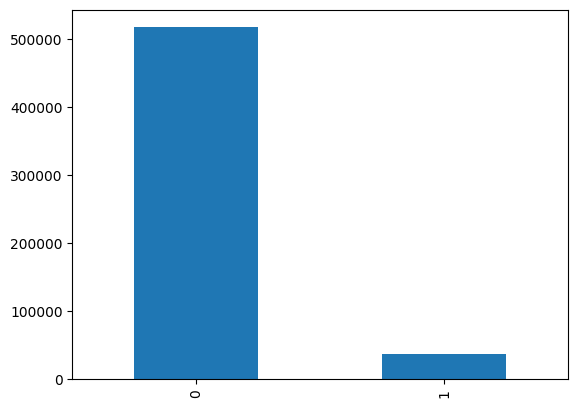

In [ ]:
# Graph displaying distribution of Malicious vs Non-Malicious traffic, according to 'Label' column from the dataset.

df['Label'].value_counts().plot(kind='bar')
print('1 = Malicious : 0 = Non-Malicious')

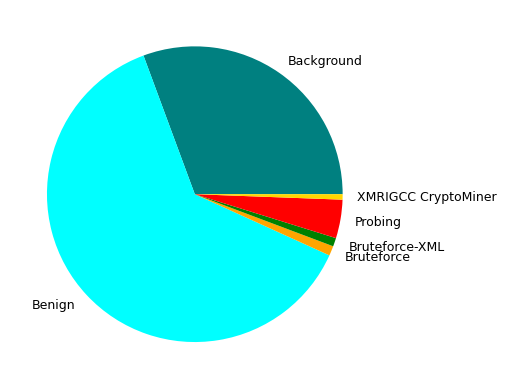

In [ ]:
# Pie chart displaying traffic distribution by type
pie_chart = df.groupby('traffic_category').size().plot(kind='pie', textprops={'fontsize': 9},
                                  colors=['teal', 'cyan', 'orange','green','red','gold'])

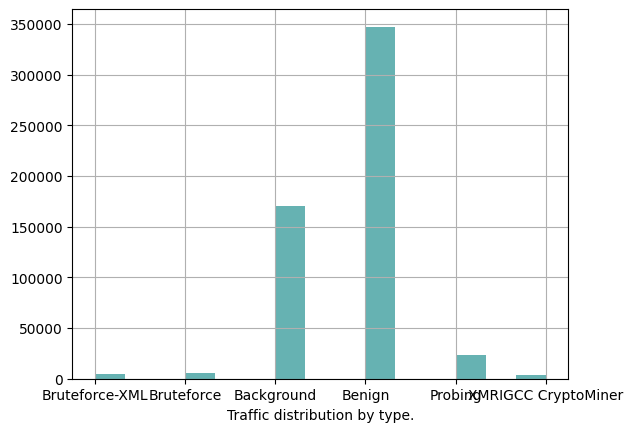

In [ ]:
# Histogram displaying traffic distribution by type

ax = df["traffic_category"].hist(bins=15, stacked=False, color='teal', alpha=0.6)
ax.set(xlabel='Traffic distribution by type.')
#plt.xlim(10,85)
plt.show()



<Axes: >

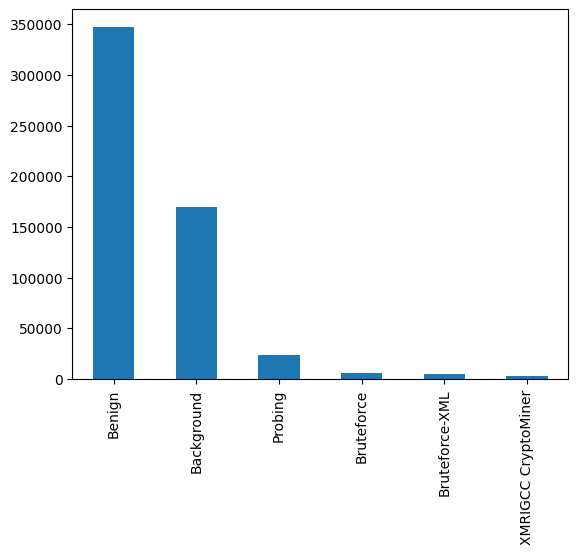

In [ ]:
df['traffic_category'].value_counts().plot(kind='bar')

In [ ]:
sns.countplot(y=df["traffic_category"])

In [ ]:
# Dropping inherent packet features.

df.drop(['uid','originh','originp','responh','responp'], axis=1, inplace=True)

In [ ]:
# Assigning features and target to an object

X = df.drop(['Label','traffic_category'], axis=1)
y = df.traffic_category

### RF FI

In [ ]:
from sklearn.ensemble import RandomForestClassifier

a = df.drop(['Label','traffic_category'], axis=1)
b = df.traffic_category

fi=RandomForestClassifier()
fi.fit(a, b)
importances = pd.DataFrame({'feature':a.columns,'importance':np.round(fi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
flow_iat.min,0.034
flow_iat.max,0.032
flow_iat.avg,0.031
active.min,0.030
flow_pkts_payload.std,0.027
active.max,0.027
payload_bytes_per_second,0.027
flow_iat.tot,0.027
fwd_pkts_payload.avg,0.026


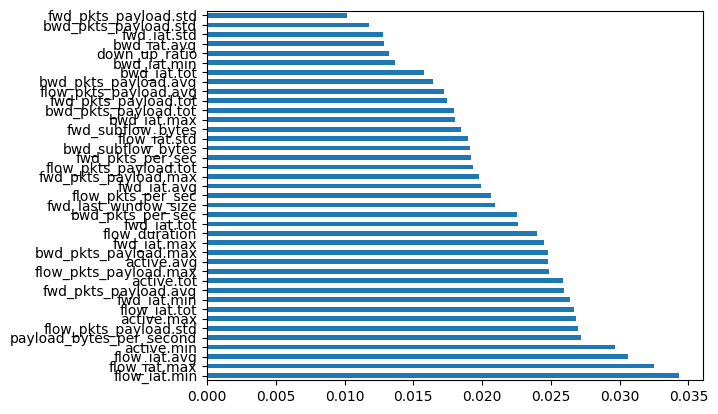

In [ ]:
# Plotting important features

feat_importances = pd.Series(fi.feature_importances_, index=a.columns)
feat_importances.nlargest(39).plot(kind='barh')
plt.show()

top_col=['flow_iat.min','flow_iat.max','flow_iat.avg', 'active.min', 'payload_bytes_per_second','flow_pkts_payload.std','active.max','flow_iat.tot','fwd_iat.min','fwd_pkts_payload.avg','active.tot','flow_pkts_payload.max','active.avg','bwd_pkts_per_sec',
         'fwd_last_window_size','']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

 #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES') 

plot_feature_importance(fi.feature_importances_, a.columns ,'RANDOM FOREST') 

In [ ]:
df.traffic_category.value_counts()
# Benign and background have significantly more data than other attack traffic.

Benign                 347431
Background             170151
Probing                 23388
Bruteforce               5884
Bruteforce-XML           5145
XMRIGCC CryptoMiner      3279
Name: traffic_category, dtype: int64

## 1. All Features used (79) . 

#### 1.1 dt_default

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Decision tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

#weight= [{0: 1, 1: 1}, {0: 1, 1: 1.5}, {0: 1, 1: 15}, {0: 1, 1: 59}, {0:1, 1:68}, {0:1, 1:106}] #testing to adjust class weight
#weight= {'Benign':1, 'Background':1.5, 'Probing':15, 'Bruteforce':59, 'Bruteforce-XML':68, 'XMRIGCC CryptoMiner':106}
dt_default = DecisionTreeClassifier(random_state=1)
dt_default = dt_default.fit(X_train,y_train)
y_pred = dt_default.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                     precision    recall  f1-score   support

         Background       0.73      0.69      0.71     51045
             Benign       0.77      0.80      0.78    104230
         Bruteforce       0.12      0.11      0.12      1765
     Bruteforce-XML       0.09      0.08      0.08      1544
            Probing       0.04      0.04      0.04      7016
XMRIGCC CryptoMiner       0.58      0.55      0.56       984

           accuracy                           0.72    166584
          macro avg       0.39      0.38      0.38    166584
       weighted avg       0.71      0.72      0.71    166584



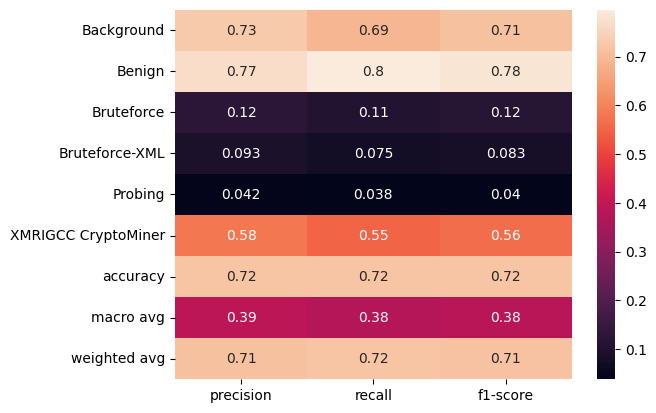

In [ ]:
#from neptune.types import File

report = (classification_report(y_test, y_pred, output_dict=True))
class_rep = sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

# Convert Seaborn object to Matplotlib format (matplotlib.Figure)
CR = class_rep.figure



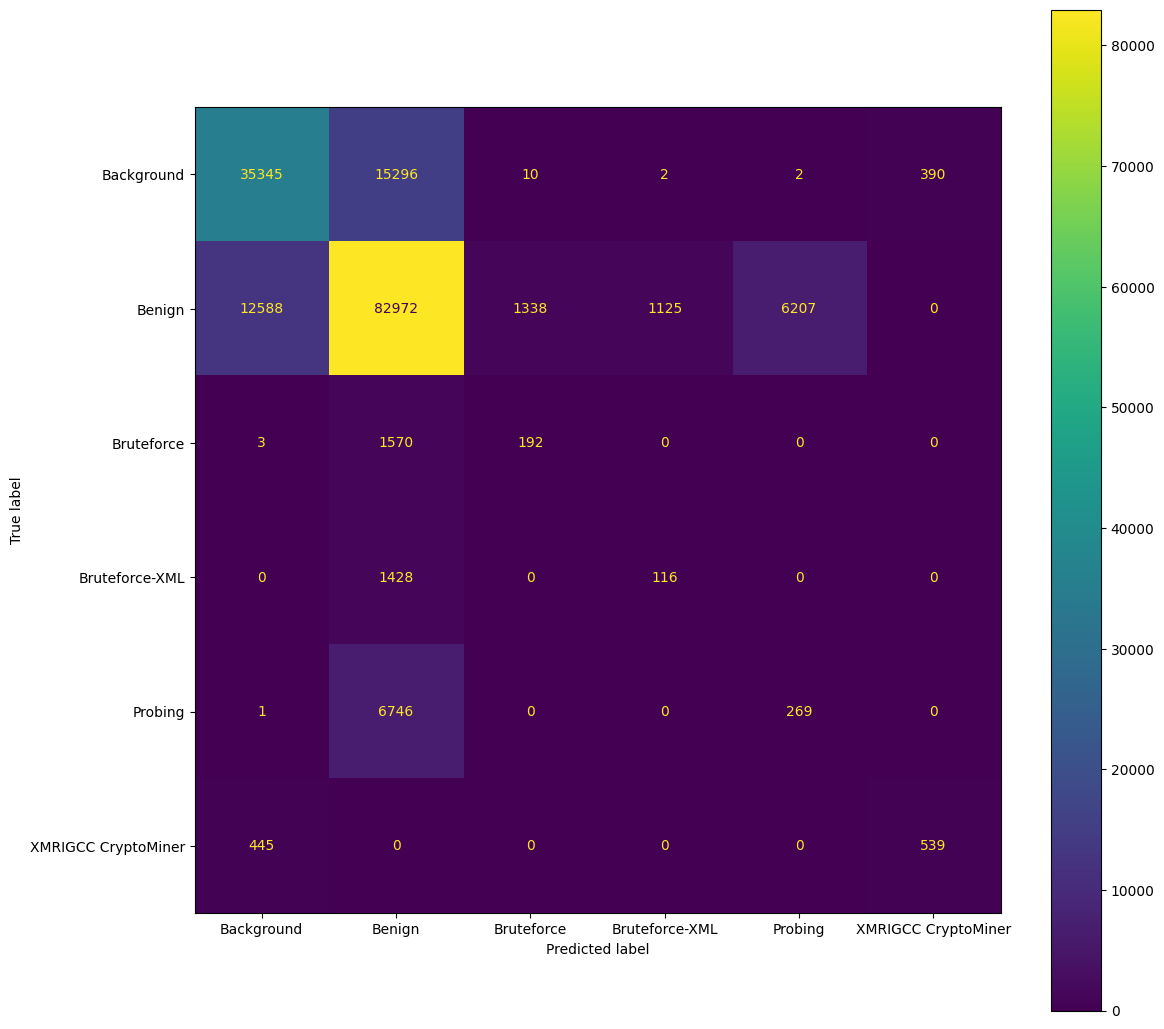

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, y_pred, labels=dt_default.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_default.classes_)
fig, ax = plt.subplots(figsize=(13,13))
disp.plot(ax=ax)
plt.show()

In [ ]:
from matplotlib import pyplot
importance = dt_default.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
print(dt_default.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=(10,10))
feat_importances = pd.Series(dt_default.feature_importances_, index=X.columns)
feat_importances.nlargest(39).plot(kind='barh')
plt.show()

In [ ]:
top_col=['flow_pkts_payload.std','flow_iat.min','flow_pkts_payload.max','down_up_ratio','fwd_pkts_payload.max','fwd_iat.min','fwd_subflow_bytes','flow_iat.max','payload_bytes_per_second','active.tot','bwd_iat.tot','flow_iat.std','flow_pkts_payload.min','fwd_last_window_size','active.min','bwd_pkts_payload.min','fwd_iat.max','fwd_header_size_tot','bwd_iat.max','bwd_iat.std','bwd_init_window_size','bwd_iat.min','fwd_pkts_payload.std','fwd_iat.std','fwd_init_window_size','flow_duration','flow_duration','flow_iat.avg','flow_pkts_payload.tot','fwd_iat.tot','bwd_pkts_payload.std','bwd_iat.avg','fwd_pkts_per_sec','flow_pkts_payload.avg','active.max','fwd_pkts_payload.tot','active,avg','bwd_pkts_payload.avg','fwd_header_size_max','fwd_pkts_payload.avg']
X_top = df[[c for c in df.columns if c in top_col]]

#### Neptune run

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')
pre = precision_score(y_test,y_pred, average='macro')
rec = recall_score(y_test,y_pred, average='macro')

In [ ]:
#Logging by runtime

run["train_dataset"].track_files("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")

PARAMS = {"criterion":"gini","Resample":"None","Test size":0.3}
 
run["my_params"] = PARAMS
run["description"] = "dt_default : This decision tree model was trained with default data without no resampling method applied."
# You can also specify parameters one by one

# Update lr value
run["Result/score"] = report
run["Result/accuracy"] = acc
run["Result/f1-score"] = f1
run["Result/precision"] = pre
run["Result/recall"] = rec
run["classif_report"].upload(CR)
run["Result/confusion_matrix"] = fig


In [ ]:
# Logging by model
model = neptune.init_model(
    name="dt_default",
    key="DTDEF", 
    project="mikhailamzar/FYP2", 
    api_token=my_api_token, # your credentials
)

model["Dataset"].track_files("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")
model["Result/score"] = report
model["Result/accuracy"] = acc
model["Result/f1-score"] = f1
model["Result/precision"] = pre
model["Result/recall"] = rec
run["classif_report"].upload(CR)
model["Result/confusion_matrix"] = fig

https://app.neptune.ai/mikhailamzar/FYP2/m/FYP-DTDEF


In [ ]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
All 1 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/mikhailamzar/FYP2/e/FYP-15/metadata


#### 1.2 SMOTE

In [ ]:
X=df.drop(['Label','traffic_category'], axis=1)
y=df.traffic_category

In [ ]:
df.info()

In [ ]:
A_train, A_test, b_train, b_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from collections import Counter
from sklearn.tree import DecisionTreeClassifier #Decision tree
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE

print(Counter(b_train))

Counter({'Benign': 243254, 'Background': 118943, 'Probing': 16459, 'Bruteforce': 4120, 'Bruteforce-XML': 3609, 'XMRIGCC CryptoMiner': 2309})


In [ ]:
print(Counter(b_test))

Counter({'Benign': 104177, 'Background': 51208, 'Probing': 6929, 'Bruteforce': 1764, 'Bruteforce-XML': 1536, 'XMRIGCC CryptoMiner': 970})


In [ ]:
oversample = SMOTE()
A_over, b_over = oversample.fit_resample(A_train, b_train)
counter= Counter(b_over)
print(counter)

Counter({'Background': 243254, 'Benign': 243254, 'Probing': 243254, 'Bruteforce': 243254, 'Bruteforce-XML': 243254, 'XMRIGCC CryptoMiner': 243254})


In [ ]:
A_over.shape

(1459524, 79)

In [ ]:
b_over.shape

(1459524,)

In [ ]:
dtSMOTE = DecisionTreeClassifier(random_state=1)
dtSMOTE = dtSMOTE.fit(A_over,b_over)
dt_def_pred = dtSMOTE.predict(A_test)

In [ ]:
from sklearn.metrics import classification_report
report_def_o = classification_report(b_test, dt_def_pred)
print(report_def_o)

                     precision    recall  f1-score   support

         Background       0.67      0.84      0.74     51208
             Benign       0.81      0.71      0.76    104177
         Bruteforce       0.18      0.18      0.18      1764
     Bruteforce-XML       0.12      0.12      0.12      1536
            Probing       0.05      0.05      0.05      6929
XMRIGCC CryptoMiner       0.49      0.76      0.59       970

           accuracy                           0.71    166584
          macro avg       0.39      0.44      0.41    166584
       weighted avg       0.72      0.71      0.71    166584



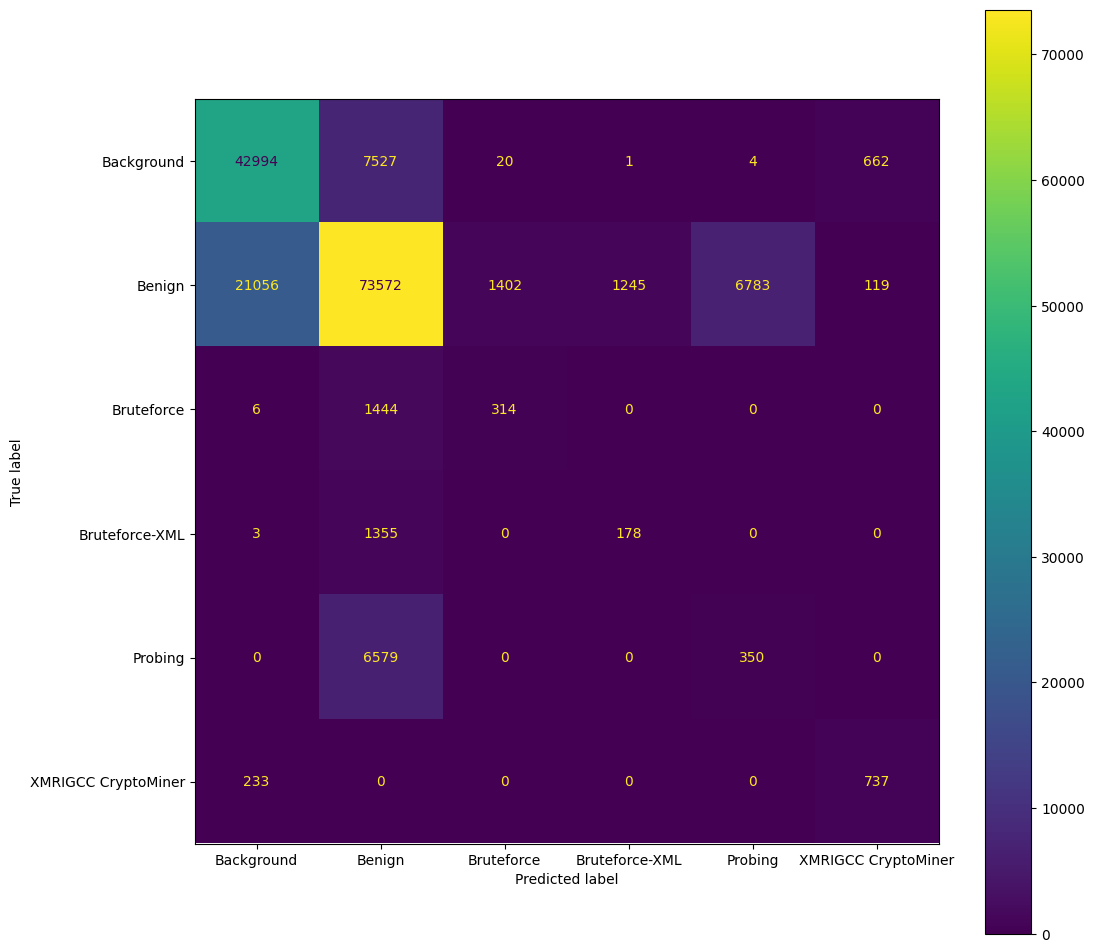

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(b_test, dt_def_pred, labels=dtSMOTE.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtSMOTE.classes_)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax)
plt.show()


#### Neptune run

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(b_test,dt_def_pred)
f1 = f1_score(b_test,dt_def_pred, average='macro')
pre = precision_score(b_test,dt_def_pred, average='macro')
rec = recall_score(b_test,dt_def_pred, average='macro')

In [ ]:
run["train_dataset"].track_files("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")

PARAMS = {"criterion":"gini","Resample":"SMOTE","Test size":0.3}
 
run["my_params"] = PARAMS

# You can also specify parameters one by one

# Update lr value
run["Result/score"] = report_def_o
run["Result/accuracy"] = acc
run["Result/f1-score"] = f1
run["Result/precision"] = pre
run["Result/recall"] = rec
run["Result/confusion_matrix"] = fig


In [ ]:
model = neptune.init_model(
    name="dtSMOTE",
    key="DTSMOTE", 
    project="mikhailamzar/FYP2", 
    api_token=my_api_token, # your credentials
)

model["Dataset"].track_files("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")
model["Result/score"] = report_def_o
model["Result/accuracy"] = acc
model["Result/f1-score"] = f1
model["Result/precision"] = pre
model["Result/recall"] = rec
model["Result/confusion_matrix"] = fig

https://app.neptune.ai/mikhailamzar/FYP2/m/FYP-DTSMOTE


In [ ]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 3 operations to synchronize with Neptune. Do not kill this process.
All 3 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/mikhailamzar/FYP2/e/FYP-10/metadata


#### 1.3 RUS

In [ ]:
X=df.drop(['Label','traffic_category'], axis=1)
y=df.traffic_category

In [ ]:
df.info()

In [ ]:
A_train, A_test, b_train, b_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier #Decision tree
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from numpy import mean

#Summarize class distribution
print(Counter(y))

#Defining the undersample strategy
undersample = RandomUnderSampler(sampling_strategy = 'not minority')

#fit and apply
A_under,b_under = undersample.fit_resample(A_train,b_train)

#Summarize new class distribution
print(Counter(b_under))

#Another time to resample background aswell. may need to use alt code


Counter({'Benign': 347431, 'Background': 170151, 'Probing': 23388, 'Bruteforce': 5884, 'Bruteforce-XML': 5145, 'XMRIGCC CryptoMiner': 3279})
Counter({'Background': 2295, 'Benign': 2295, 'Bruteforce': 2295, 'Bruteforce-XML': 2295, 'Probing': 2295, 'XMRIGCC CryptoMiner': 2295})


In [ ]:
from matplotlib import pyplot
from numpy import where

print(Counter(b_train))

Counter({'Benign': 243201, 'Background': 119106, 'Probing': 16372, 'Bruteforce': 4119, 'Bruteforce-XML': 3601, 'XMRIGCC CryptoMiner': 2295})


In [ ]:
print(Counter(b_test))

Counter({'Benign': 104230, 'Background': 51045, 'Probing': 7016, 'Bruteforce': 1765, 'Bruteforce-XML': 1544, 'XMRIGCC CryptoMiner': 984})


In [ ]:
A_over.shape

(13854, 79)

In [ ]:
b_over.shape

(13854,)

In [ ]:
dtRUS = DecisionTreeClassifier(random_state=1)
dtRUS = dtRUS.fit(A_under,b_under)
dt_def_pred = dtRUS.predict(A_test)

In [ ]:
from sklearn.metrics import classification_report
report_def_u = classification_report(b_test, dt_def_pred)
print(report_def_u)

                     precision    recall  f1-score   support

         Background       0.60      0.79      0.68     51045
             Benign       0.85      0.57      0.68    104230
         Bruteforce       0.43      0.97      0.60      1765
     Bruteforce-XML       0.50      0.98      0.66      1544
            Probing       0.28      0.83      0.42      7016
XMRIGCC CryptoMiner       0.49      0.99      0.66       984

           accuracy                           0.66    166584
          macro avg       0.53      0.85      0.62    166584
       weighted avg       0.74      0.66      0.67    166584



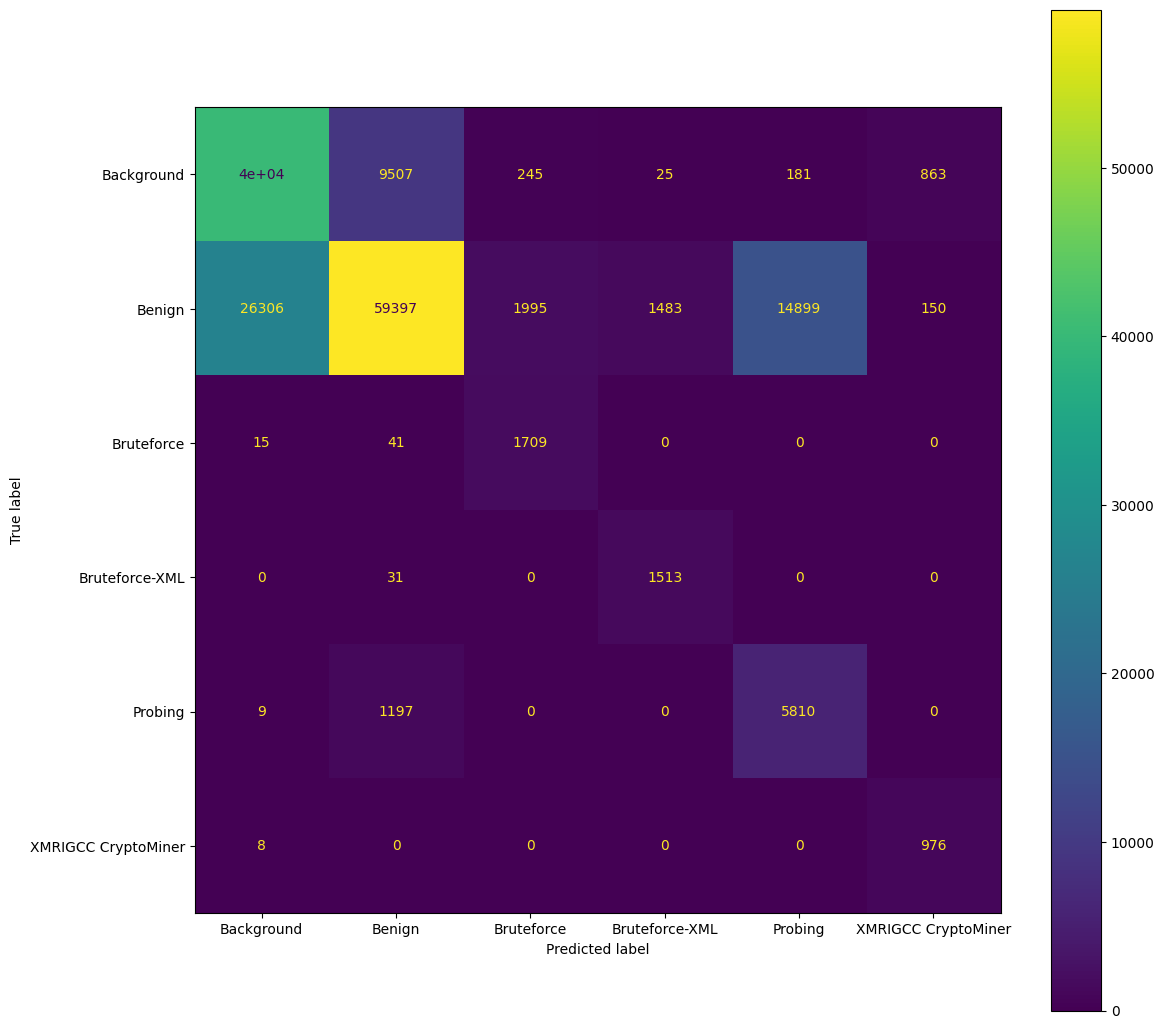

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(b_test, dt_def_pred, labels=dtRUS.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtRUS.classes_)
fig, ax = plt.subplots(figsize=(13,13))
disp.plot(ax=ax)
plt.show()


#### Neptune run

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(b_test,dt_def_pred)
f1 = f1_score(b_test,dt_def_pred, average='macro')
pre = precision_score(b_test,dt_def_pred, average='macro')
rec = recall_score(b_test,dt_def_pred, average='macro')

In [ ]:
run["train_dataset"].track_files("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")

PARAMS = {"criterion":"gini","Resample":"RandomUnderSampler","Test size":0.3}
 
run["my_params"] = PARAMS

# You can also specify parameters one by one

# Update lr value
run["Result/score"] = report_def_u
run["Result/accuracy"] = acc
run["Result/f1-score"] = f1
run["Result/precision"] = pre
run["Result/recall"] = rec
run["Result/confusion_matrix"] = fig


In [ ]:
model = neptune.init_model(
    name="dtRUS",
    key="DTRUS", 
    project="mikhailamzar/FYP2", 
    api_token=my_api_token, # your credentials
)

model["Dataset"].track_files("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")
model["Result/score"] = report_def_u
model["Result/accuracy"] = acc
model["Result/f1-score"] = f1
model["Result/precision"] = pre
model["Result/recall"] = rec
model["Result/confusion_matrix"] = fig

https://app.neptune.ai/mikhailamzar/FYP2/m/FYP-DTRUS


In [ ]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
All 1 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/mikhailamzar/FYP2/e/FYP-8/metadata


## 2. Important Features used (39)

Gathered from feature_importance_ attribute of a DecisionTreeClassifier that was trained and tested using data with default distribution.

Feature importance decision tree

### 2.1 dt_default

In [ ]:
top_col=['flow_pkts_payload.std','flow_iat.min','flow_pkts_payload.max','down_up_ratio','fwd_pkts_payload.max','fwd_iat.min','fwd_subflow_bytes','flow_iat.max','payload_bytes_per_second','active.tot','bwd_iat.tot','flow_iat.std','flow_pkts_payload.min','fwd_last_window_size','active.min','bwd_pkts_payload.min','fwd_iat.max','fwd_header_size_tot','bwd_iat.max','bwd_iat.std','bwd_init_window_size','bwd_iat.min','fwd_pkts_payload.std','fwd_iat.std','fwd_init_window_size','flow_duration','flow_duration','flow_iat.avg','flow_pkts_payload.tot','fwd_iat.tot','bwd_pkts_payload.std','bwd_iat.avg','fwd_pkts_per_sec','flow_pkts_payload.avg','active.max','fwd_pkts_payload.tot','active,avg','bwd_pkts_payload.avg','fwd_header_size_max','fwd_pkts_payload.avg']
X_top = df[[c for c in df.columns if c in top_col]]
y=df.traffic_category

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Decision tree

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=1, stratify=y)

dt = DecisionTreeClassifier(class_weight='balanced',random_state=1)
dt = dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, dt_pred)
print(report)

                     precision    recall  f1-score   support

         Background       0.67      0.83      0.74     51045
             Benign       0.81      0.69      0.75    104230
         Bruteforce       0.22      0.25      0.24      1765
     Bruteforce-XML       0.20      0.21      0.21      1544
            Probing       0.08      0.11      0.10      7016
XMRIGCC CryptoMiner       0.47      0.57      0.52       984

           accuracy                           0.70    166584
          macro avg       0.41      0.45      0.42    166584
       weighted avg       0.72      0.70      0.71    166584



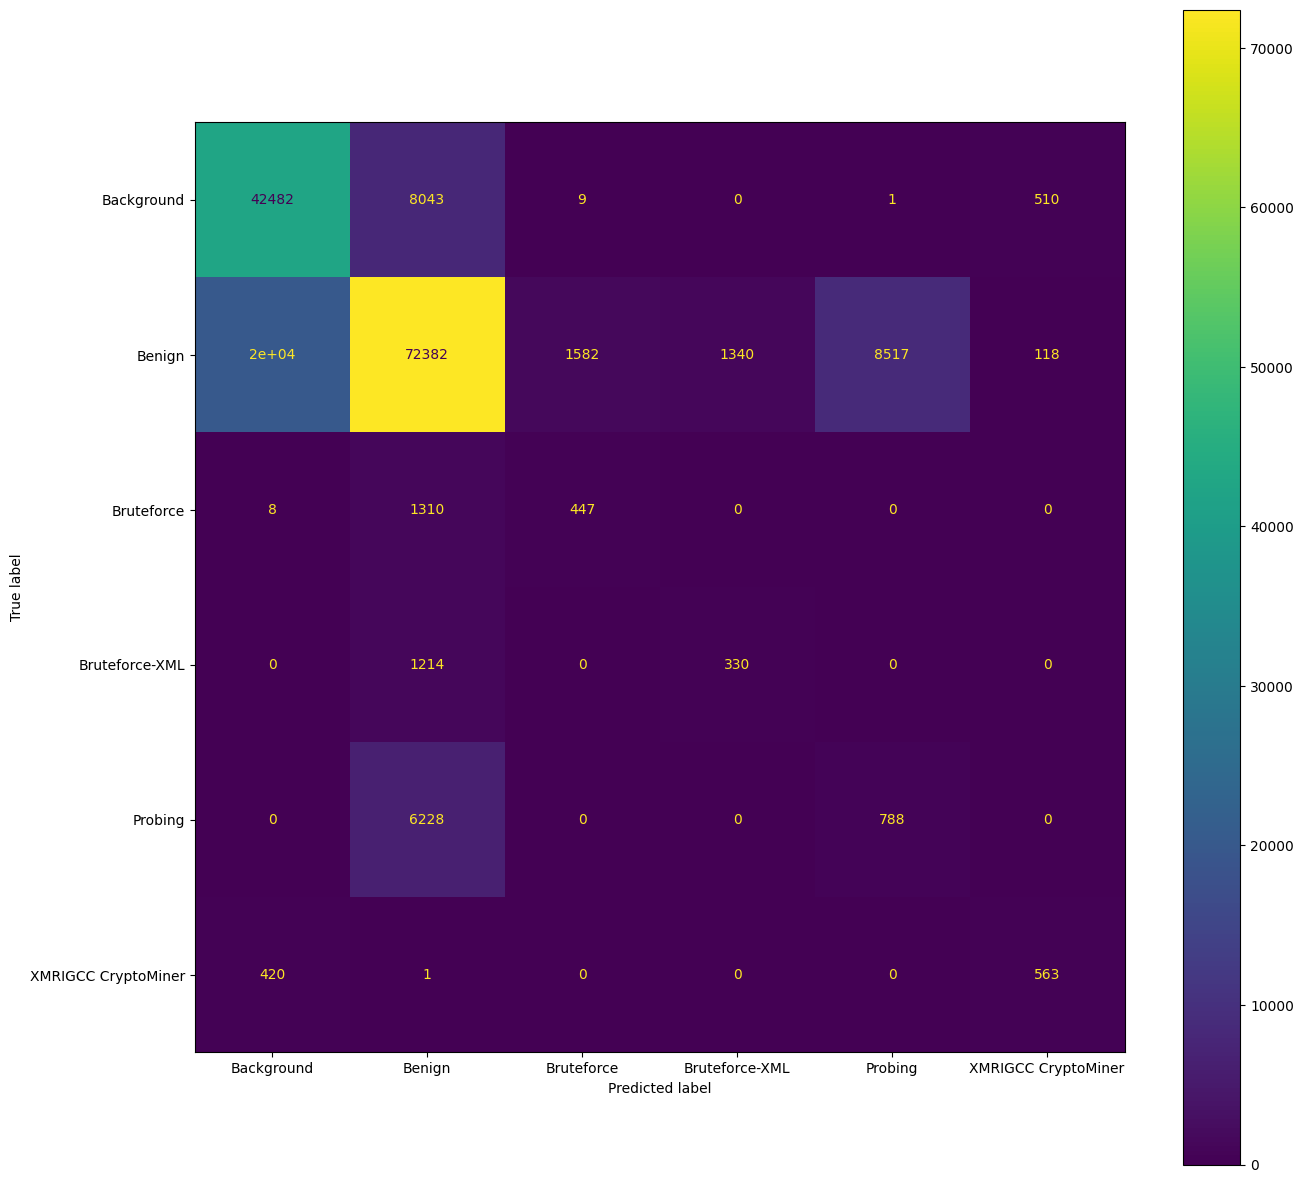

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, dt_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.show()

### 2.2 dtSMOTE

In [ ]:
df.info()

In [ ]:
A_train, A_test, b_train, b_test = train_test_split(X_top, y, test_size=0.3, random_state=1)

In [ ]:
from collections import Counter
from sklearn.tree import DecisionTreeClassifier #Decision tree
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE

print(Counter(b_train))

Counter({'Benign': 243254, 'Background': 118943, 'Probing': 16459, 'Bruteforce': 4120, 'Bruteforce-XML': 3609, 'XMRIGCC CryptoMiner': 2309})


In [ ]:
print(Counter(b_test))

Counter({'Benign': 104177, 'Background': 51208, 'Probing': 6929, 'Bruteforce': 1764, 'Bruteforce-XML': 1536, 'XMRIGCC CryptoMiner': 970})


In [ ]:
oversample2 = SMOTE()
A_over, b_over = oversample2.fit_resample(A_train, b_train)
counter= Counter(b_over)
print(counter)

Counter({'Background': 243254, 'Benign': 243254, 'Probing': 243254, 'Bruteforce': 243254, 'Bruteforce-XML': 243254, 'XMRIGCC CryptoMiner': 243254})


In [ ]:
A_over.shape

(1459524, 38)

In [ ]:
b_over.shape

(1459524,)

In [ ]:
X_top.columns

Index(['flow_duration', 'fwd_pkts_per_sec', 'down_up_ratio',
       'fwd_header_size_tot', 'fwd_header_size_max', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.avg', 'bwd_pkts_payload.std',
       'flow_pkts_payload.min', 'flow_pkts_payload.max',
       'flow_pkts_payload.tot', 'flow_pkts_payload.avg',
       'flow_pkts_payload.std', 'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.tot',
       'fwd_iat.std', 'bwd_iat.min', 'bwd_iat.max', 'bwd_iat.tot',
       'bwd_iat.avg', 'bwd_iat.std', 'flow_iat.min', 'flow_iat.max',
       'flow_iat.avg', 'flow_iat.std', 'payload_bytes_per_second',
       'fwd_subflow_bytes', 'active.min', 'active.max', 'active.tot',
       'fwd_init_window_size', 'bwd_init_window_size', 'fwd_last_window_size'],
      dtype='object')

In [ ]:
dt_default_o = DecisionTreeClassifier(random_state=1)

dt_default_o = dt_default_o.fit(A_over,b_over)

In [ ]:
dt_def_pred = dt_default_o.predict(A_test)

In [ ]:
from sklearn.metrics import classification_report
report_def_o = classification_report(b_test, dt_def_pred)
print(report_def_o)

                     precision    recall  f1-score   support

         Background       0.67      0.84      0.75     51208
             Benign       0.81      0.71      0.76    104177
         Bruteforce       0.18      0.18      0.18      1764
     Bruteforce-XML       0.13      0.12      0.12      1536
            Probing       0.05      0.05      0.05      6929
XMRIGCC CryptoMiner       0.50      0.77      0.60       970

           accuracy                           0.71    166584
          macro avg       0.39      0.44      0.41    166584
       weighted avg       0.72      0.71      0.71    166584



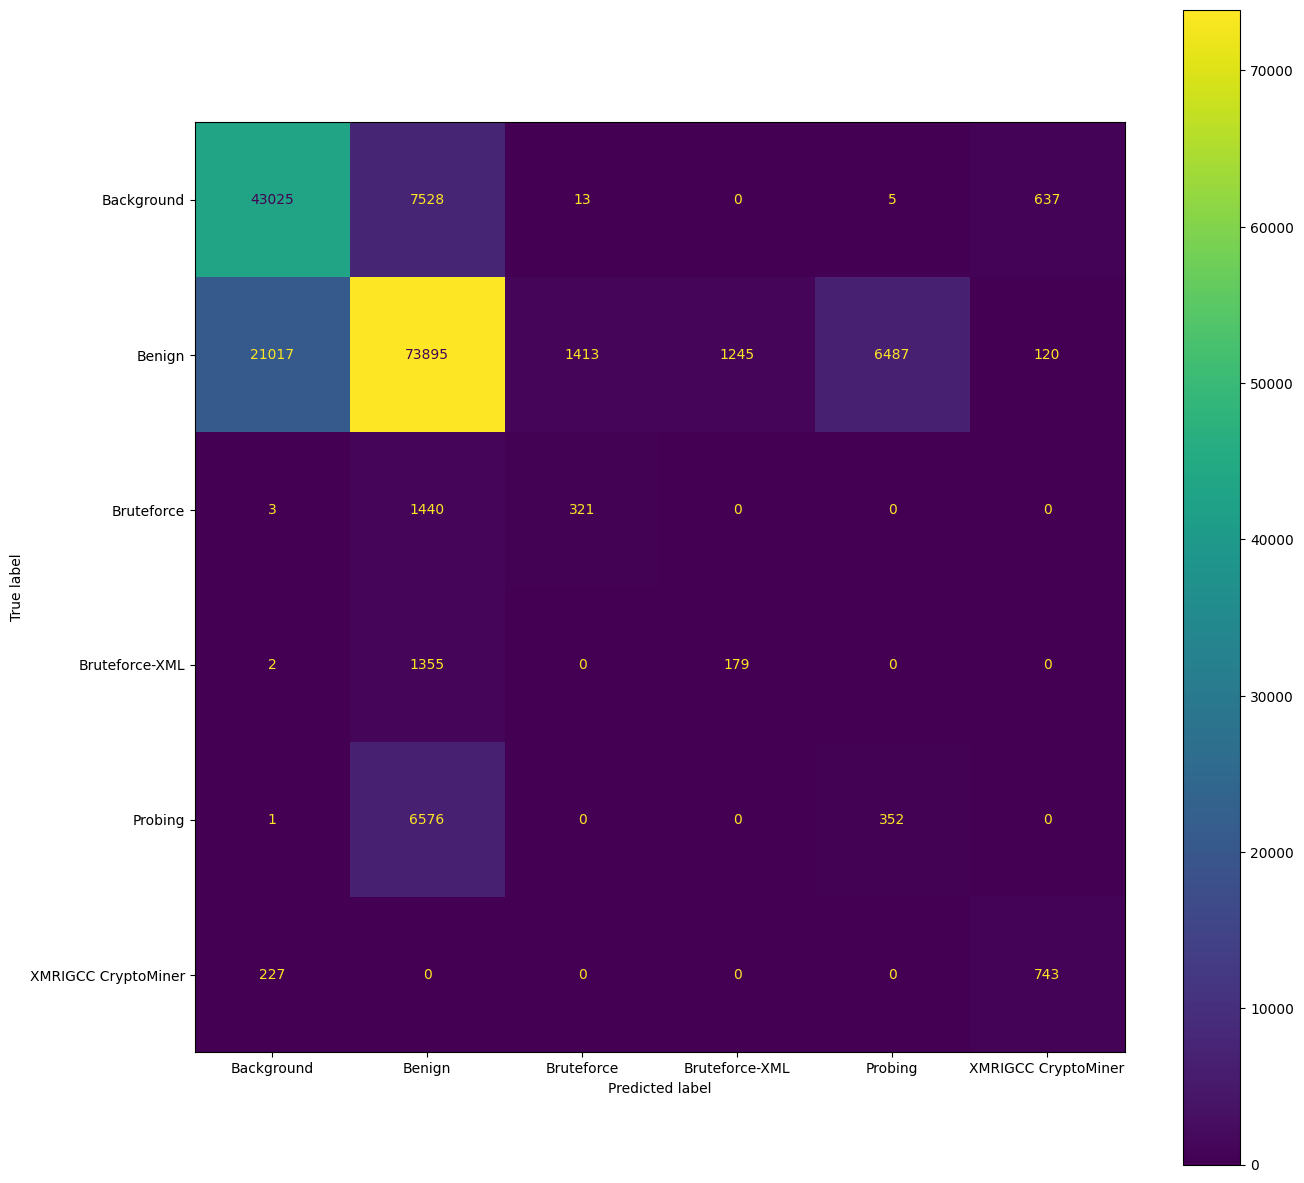

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(b_test, dt_def_pred, labels=dt_default_o.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_default_o.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.show()


### 2.3 dtRUS

In [ ]:
df.info()

In [ ]:
A_train, A_test, b_train, b_test = train_test_split(X_top, y, test_size=0.3, random_state=1)

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier #Decision tree
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from numpy import mean

#Summarize class distribution
print(Counter(y))

#Defining the undersample strategy
undersample = RandomUnderSampler(sampling_strategy = 'not minority')

#fit and apply
A_over,b_over = undersample.fit_resample(A_train,b_train)

#Summarize new class distribution
print(Counter(b_over))

#Another time to resample background aswell. may need to use alt code


Counter({'Benign': 347431, 'Background': 170151, 'Probing': 23388, 'Bruteforce': 5884, 'Bruteforce-XML': 5145, 'XMRIGCC CryptoMiner': 3279})
Counter({'Background': 2309, 'Benign': 2309, 'Bruteforce': 2309, 'Bruteforce-XML': 2309, 'Probing': 2309, 'XMRIGCC CryptoMiner': 2309})


In [ ]:
from matplotlib import pyplot
from numpy import where

print(Counter(b_over))

Counter({'Background': 2309, 'Benign': 2309, 'Bruteforce': 2309, 'Bruteforce-XML': 2309, 'Probing': 2309, 'XMRIGCC CryptoMiner': 2309})


In [ ]:
print(Counter(b_test))

Counter({'Benign': 104177, 'Background': 51208, 'Probing': 6929, 'Bruteforce': 1764, 'Bruteforce-XML': 1536, 'XMRIGCC CryptoMiner': 970})


In [ ]:
A_over.shape

(13854, 38)

In [ ]:
b_over.shape

(13854,)

In [ ]:
dt_default_u = DecisionTreeClassifier(class_weight='balanced',random_state=1)

dt_default_u = dt_default_u.fit(A_over,b_over)

In [ ]:
dt_def_pred = dt_default_u.predict(A_test)

In [ ]:
from sklearn.metrics import classification_report
report_def_u = classification_report(b_test, dt_def_pred)
print(report_def_u)

                     precision    recall  f1-score   support

         Background       0.60      0.80      0.69     51208
             Benign       0.85      0.56      0.68    104177
         Bruteforce       0.43      0.96      0.59      1764
     Bruteforce-XML       0.47      0.98      0.63      1536
            Probing       0.27      0.82      0.41      6929
XMRIGCC CryptoMiner       0.48      0.99      0.65       970

           accuracy                           0.65    166584
          macro avg       0.52      0.85      0.61    166584
       weighted avg       0.74      0.65      0.67    166584



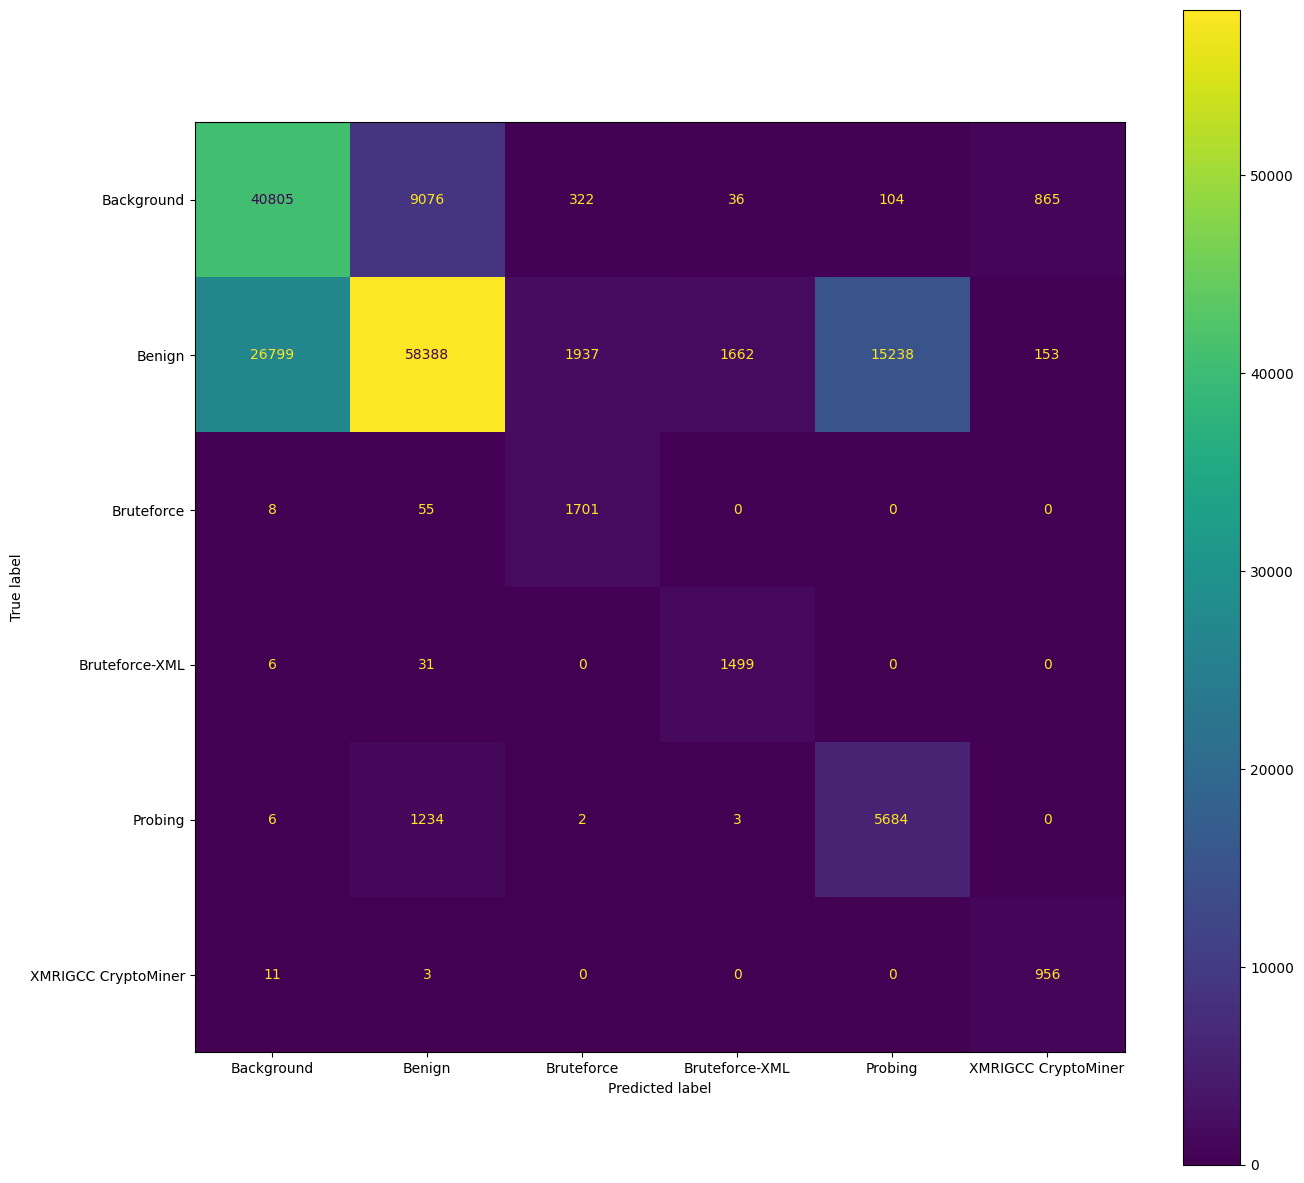

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(b_test, dt_def_pred, labels=dt_default_u.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_default_u.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.show()


# Temp

## Neptune

### install *neptune*

In [ ]:
! pip install -U neptune
import neptune

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.6/442.6 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.2 MB/s eta 0:00:00


### .

In [ ]:
from getpass import getpass


my_api_token = getpass("Enter your Neptune API token: ")
my_project = "mikhailamzar/FYP2"

Enter your Neptune API token: ··········


In [ ]:
run = neptune.init_run(api_token=my_api_token, project=my_project)

https://app.neptune.ai/mikhailamzar/FYP2/e/FYP-2


In [ ]:
run.stop()